In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

HERE WE WILL WITHOUT USING SimpleImputer

In [5]:
dff=sns.load_dataset('titanic')
dff.isnull().mean()*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


In [10]:
dff.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
218,1,1,female,32.0,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True


In [8]:
dff.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [36]:
sam=dff.drop(columns=[ 'pclass', 'sex','sibsp', 'parch','alive', 'alone','embark_town', 'deck','class','who','adult_male','embarked'  ])

In [37]:
sam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   age       714 non-null    float64
 2   fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [44]:
sam.isnull().mean()*100

,0
survived,0.00000
age,19.86532
fare,0.00000


#mean, mode replaceing    checking for boxplot,density plot,correalation and variance before and after


In [39]:
fea=sam.drop(columns=['survived'])
tar=sam['survived']

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(fea,tar,test_size=0.2)

In [41]:
mean_age=xtrain['age'].mean()
meadian_age=xtrain['age'].median()

In [42]:
xtrain['age_mean']=xtrain['age'].fillna(mean_age)
xtrain['age_median']=xtrain['age'].fillna(meadian_age)

In [43]:
xtrain

,age,fare,age_mean,age_median
756,28.0,7.7958,28.00000,28.0
202,34.0,6.4958,34.00000,34.0
185,NaN,50.0000,30.08363,29.0
197,42.0,8.4042,42.00000,42.0
148,36.5,26.0000,36.50000,36.5
...,...,...,...,...
445,4.0,81.8583,4.00000,4.0
705,39.0,26.0000,39.00000,39.0
853,16.0,39.4000,16.00000,16.0
246,25.0,7.7750,25.00000,25.0


In [45]:
xtrain.corr()

,age,fare,age_mean,age_median
age,1.000000,0.094204,1.000000,1.000000
fare,0.094204,1.000000,0.089322,0.092017
age_mean,1.000000,0.089322,1.000000,0.999480
age_median,1.000000,0.092017,0.999480,1.000000


In [51]:
#checking for the co varince in both
#less varince more consistency
#hhaving less varince is the good part

print("\n varinace of age is:" ,xtrain['age'].var())
print("\n\n varinace of null replace with mean in age columns is:" ,xtrain['age_mean'].var())
print("\n varinace of null replace with median in age columns is:" ,xtrain['age_median'].var())


 varinace of age is: 220.46500288385266


 varinace of null replace with mean in age columns is: 177.3642498587392

 varinace of null replace with median in age columns is: 177.5489987673639


this is a boxplot of 756    28.0
202    34.0
185     NaN
197    42.0
148    36.5
       ... 
445     4.0
705    39.0
853    16.0
246    25.0
876    20.0
Name: age, Length: 712, dtype: float64 
this is a histplot of 756    28.0
202    34.0
185     NaN
197    42.0
148    36.5
       ... 
445     4.0
705    39.0
853    16.0
246    25.0
876    20.0
Name: age, Length: 712, dtype: float64 


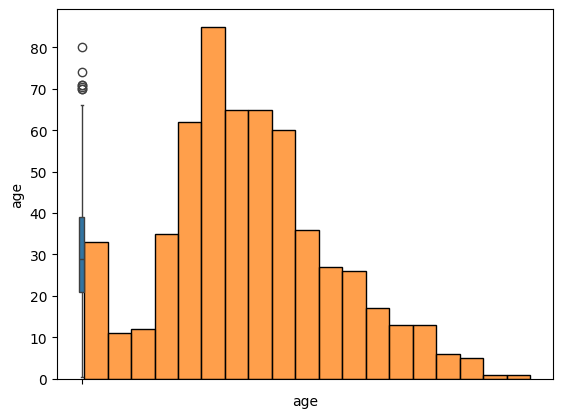

this is a boxplot of 756    28.00000
202    34.00000
185    30.08363
197    42.00000
148    36.50000
         ...   
445     4.00000
705    39.00000
853    16.00000
246    25.00000
876    20.00000
Name: age_mean, Length: 712, dtype: float64 
this is a histplot of 756    28.00000
202    34.00000
185    30.08363
197    42.00000
148    36.50000
         ...   
445     4.00000
705    39.00000
853    16.00000
246    25.00000
876    20.00000
Name: age_mean, Length: 712, dtype: float64 


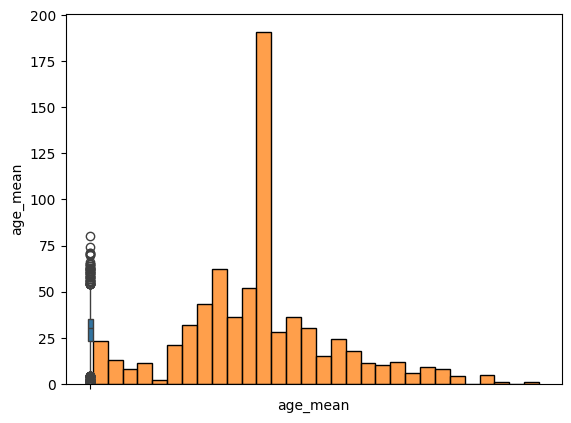

this is a boxplot of 756    28.0
202    34.0
185    29.0
197    42.0
148    36.5
       ... 
445     4.0
705    39.0
853    16.0
246    25.0
876    20.0
Name: age_median, Length: 712, dtype: float64 
this is a histplot of 756    28.0
202    34.0
185    29.0
197    42.0
148    36.5
       ... 
445     4.0
705    39.0
853    16.0
246    25.0
876    20.0
Name: age_median, Length: 712, dtype: float64 


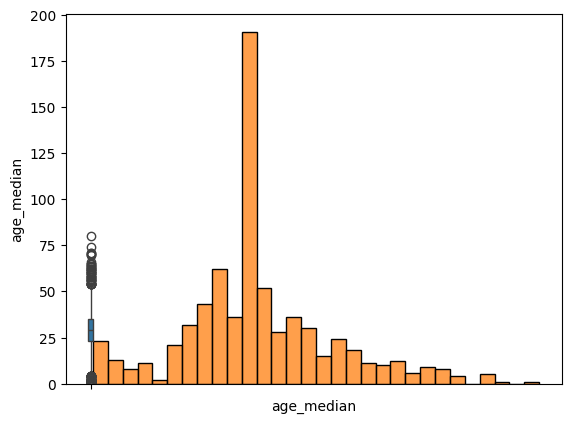

In [59]:
#plotting density and boxplpt
q=[xtrain['age'],xtrain['age_mean'],xtrain['age_median']]
for i in q:
  print(f"this is a boxplot of {i} ")
  sns.boxplot(i)
  print(f"this is a histplot of {i} ")
  sns.histplot(i)
  plt.show()


this is a boxplot of 756    28.0
202    34.0
185     NaN
197    42.0
148    36.5
       ... 
445     4.0
705    39.0
853    16.0
246    25.0
876    20.0
Name: age, Length: 712, dtype: float64 
this is a boxplot of 756    28.00000
202    34.00000
185    30.08363
197    42.00000
148    36.50000
         ...   
445     4.00000
705    39.00000
853    16.00000
246    25.00000
876    20.00000
Name: age_mean, Length: 712, dtype: float64 
this is a boxplot of 756    28.0
202    34.0
185    29.0
197    42.0
148    36.5
       ... 
445     4.0
705    39.0
853    16.0
246    25.0
876    20.0
Name: age_median, Length: 712, dtype: float64 


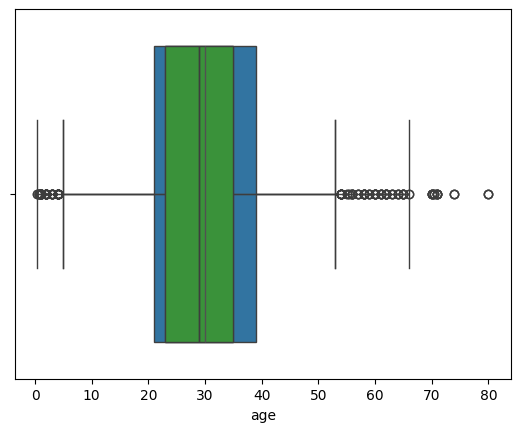

In [58]:
  for i in q:
    print(f"this is a boxplot of {i} ")
    sns.boxplot(x=i)

Now we Will use SimpleImputer


In [62]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

In [63]:
ct=ColumnTransformer(
    transformers=[
        ('t1',imputer1,['age'])],
        remainder ='passthrough'

)

In [68]:
ct.fit_transform(xtrain)

array([[28.        ,  7.7958    , 28.        , 28.        ],
       [34.        ,  6.4958    , 34.        , 34.        ],
       [30.08363002, 50.        , 30.08363002, 29.        ],
       ...,
       [16.        , 39.4       , 16.        , 16.        ],
       [25.        ,  7.775     , 25.        , 25.        ],
       [20.        ,  9.8458    , 20.        , 20.        ]])

<Axes: >

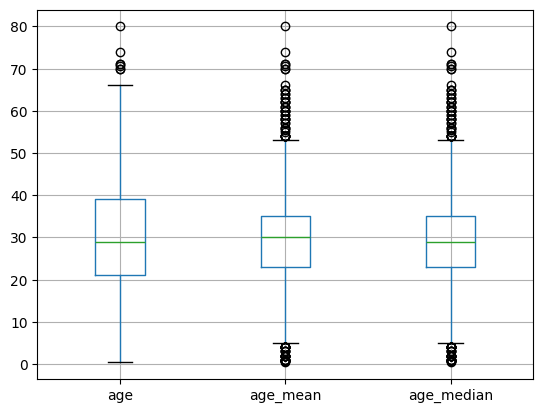

In [72]:

xtrain[['age','age_mean','age_median']].boxplot()